# Overview
This exercise uses the Jupyter and Python you have learned in the tutorials, to manipulate, plot, and then analyse some experimental data. You will be given data for the **vapour pressure** of CO<sub>2</sub>. This is the pressure of a gas when it is in equilibrium with a condensed phase (solid or liquid). The vapour pressure approximately varies with temperature according to the Clausius-Clapeyron equation. 

If you have not yet seen the derivation of this equation, it is not essential for this exercise, but is included [below](#clausius_clapeyron_derivation) if you are interested. 

Integrating the Clausius-Clapeyron equation gives a **linear** relationship between $\ln p$ and $1/T$, which means for a given phase equilibrium (i.e. solid—gas or liquid—gas) a plot of $\ln p$ against $1/T$ gives (approximately) a straight line. Furthermore, as explained below, the **slope** of this line is proportional to the **phase transition enthalpy** for these two phases.

This means that experimental **vapour pressure** data can used to fit a straight line (linear regression) according to the Clausius-Clapeyron equation. This fitting allows you to describe the range of temperatures and pressures where either solid and gas, or solid and liquid, or all three phases, are in equilibrium, and to calculate various enthalpy changes for phase transitions.

<div class="alert alert-success"> 
## Assessment

When you have finished the exercise, save your completed notebook, using **File > Save and Checkpoint** in the Jupyter menu. Then upload your notebook for assessment using Moodle. Please make sure that you upload the `Exercise.ipynb` file, and that it is not an old version of the notebook (check the modification date and time before you upload).

This notebook contains cells marked `# TEST CELL`. These contain hidden `assert` statements that will be used to test your code and calculate your mark. The comments in each cell describe what is being tested.

Because your notebook will be marked by running your code, you should check that everything works as you expect when running from top to bottom. Because notebook cells can be run in any order, it is possible to have code that looks correct, but that gives errors when run by someone else. When you are happy with your notebook, you can test it by selecting **Kernel > Restart & Run All** from the Jupyter menu.
<div/>


# Finding the Triple Point of CO<sub>2</sub><a id='top'></a>

This is the phase diagram of CO<sub>2</sub>, which shows the ranges of temperature and pressure where different phases are stable.

<img style="width:600px" src="figures/CO2_phase_diagram.png" />

The solid lines on this diagram are **phase-coexistence lines**, which describe the temperatures and pressures where two phases are in equilibrium. These lines describe the conditions (pressure and temperature) for  
(a) solid—gas phase equilibrium.  
(b) solid–liquid equilibrium.  
(c) liquid–gas equilibrium.

All three solid lines meet at the point marked in blue. This is the **triple point**, and is the pressure and temperature where all three phases coexist; solid, liquid, and gas are all in equilibrium.

The phase-coexistence lines have slopes given by the [Clapeyron equation](#clapeyron_derivation),

\begin{equation}
\frac{\mathrm{d}p}{\mathrm{d}T}= \frac{\Delta H_\mathrm{m}}{T\Delta V_\mathrm{m}} .
\end{equation}

For phase coexistence between solid and gas (sublimation) or liquid and gas (vapourisation), the slopes are approximately given by the [Clausius-Clapeyron equation](#clausius_clapeyron_derivation),

\begin{equation}
\frac{\mathrm{d}p}{\mathrm{d}T} = \frac{p \Delta H_\mathrm{m}}{RT^2},
\end{equation}

which can be [integrated](#integrated_CC_equation) to give

\begin{equation}
\ln p = - \frac{\Delta H}{RT} +\mathrm{constant}
\end{equation}

More detailed derivations of these equations are given at the bottom of this notebook.

## Exercise

The vapour pressure of CO<sub>2</sub> is given in the table below for different temperatures:

\begin{array}{cc}
T\,\mathrm{[K]} & 196 & 206 & 211 & 221 & 226 & 236 \\
p\,\mathrm{[}10^5\,\mathrm{Pa]} & 1.146 & 2.479 & 3.558 & 6.296 & 7.704 & 11.212
\end{array}
<br/>

## 1. Preliminary Data Plotting

Plot these data in the form $\ln p$ versus $1/T$.

Create two `numpy` arrays, called `temperature` and `pressure` to store the data you have been given. Then use these to convert the data into the correct format for plotting, with this stored in two more array, `inverse_temperature` and `log_pressure`. You might need to convert into SI units.

In [6]:
# importing the modules you will need

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
temperature = np.array([196,206,211,221,226,236])
pressure = np.array([1.146e5,2.479e5,3.558e5,6.296e5,7.704e5,11.212e5])
print(temperature)
print(pressure)

[196 206 211 221 226 236]
[ 114600.  247900.  355800.  629600.  770400. 1121200.]


In [10]:
# TEST CELL
# - check `temperature` is correct.
# - check `pressure is correct.
# Total marks: 1

In [11]:
from math import log
inverse_temperature = 1/temperature
log_pressure = np.log(pressure)
print(inverse_temperature)
print(log_pressure)

[0.00510204 0.00485437 0.00473934 0.00452489 0.00442478 0.00423729]
[11.64920308 12.42078072 12.78212405 13.35283998 13.55466514 13.9299101 ]


In [9]:
# TEST CELL
# - check `inverse_temperature` is correct.
# - check `log_pressure` is correct.
# Total marks: 1

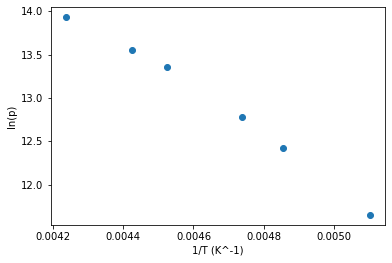

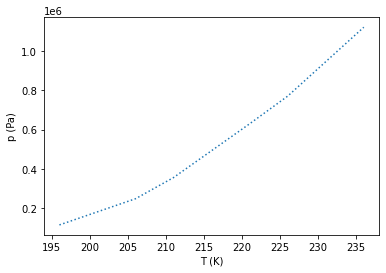

In [12]:
plt.plot( inverse_temperature, log_pressure, 'o' )
plt.xlabel( '1/T (K^-1)')
plt.ylabel( 'ln(p)' )
plt.show()

plt.plot(temperature, pressure, ':')
plt.xlabel('T (K)')
plt.ylabel('p (Pa)')
plt.show()

You should have a plot that shows **two** subsets of the data, each following a different straight line relationship. This means the data collected follow two coexistence lines, corresponding to the solid--gas _and_ liquid-gas phase equilibria. By considering which data are high-temperature, and which are low-temperature, and using the phase diagram above, you should be able to assign one region of the data to the solid--gas coexistence line, and the other to the liquid-gas coexistence line.

Replot the data so that the high temperature and low temperature data are shown as distinct data sets.

[0.00452489 0.00442478 0.00423729]
[0.00510204 0.00485437 0.00473934]
[13.35283998 13.55466514 13.9299101 ]
[11.64920308 12.42078072 12.78212405]
[196 206 211]


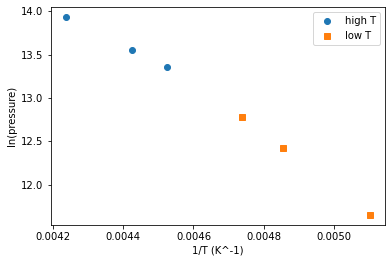

In [38]:
high_t = np.array([221,226,236])
low_t = np.array([196,206,211])
high_p = np.array([6.296e5,7.704e5,11.212e5])
low_p = np.array([1.146e5,2.479e5,3.558e5])
high_iT = 1/high_t
low_iT = 1/low_t
high_lnp = np.log(high_p)
low_lnp = np.log(low_p)
print(high_iT)
print(low_iT)
print(high_lnp)
print(low_lnp)
print(temperature[0:3])
plt.plot( high_iT, high_lnp, 'o', label='high T' ) # High temperature data points
plt.plot( low_iT, low_lnp, 's', label='low T' ) # Low temperature data points
plt.xlabel( '1/T (K^-1)')
plt.ylabel( 'ln(pressure)' )
plt.legend()
plt.show()

## 2. Calculating ΔH<sub>sub</sub> and ΔH<sub>vap</sub>
By performing separate [linear regressions](Tutorial%205.ipynb#Linear-Regression) on the low temperature data and high temperature data, calculate

  * the latent heat of sublimation, in J.
  * the latent heat of vapourisation, in J.
  
Make sure the check which slices of `inverse_temperature` and `log_pressure` correspond to high and low temperature.

The latent heat of sublimation is the enthalpy change to convert one mole of a substance from solid to gas at constant pressure.  
The latent heat of vapourisation is the enthalpy change to convert one mole of a substance from liquid to gas at constant pressure.

In [13]:
from scipy.stats import linregress

slope_high_T, intercept_high_T, rvalue, pvalue, stderr = linregress( inverse_temperature[3:6], log_pressure[3:6] )
slope_low_T,  intercept_low_T,  rvalue, pvalue, stderr2 = linregress( inverse_temperature[0:3], log_pressure[0:3] )
print(slope_high_T)
print(slope_low_T)
print(intercept_high_T)
print(intercept_low_T)

-2005.8573237580445
-3122.229119628386
22.429521006810038
27.57853156820665


In [14]:
# TEST CELL
# - check `slope_high_T` is correct.
# - check `slope_low_T` is correct.
# - check `intercept_high_T` is correct.
# - check `intercept_low_T` is correct.
# Total marks: 3

To calculate $\Delta H_\mathrm{sub}$ and $\Delta H_\mathrm{vap}$ from the fitted slopes you need the gas constant $R$.

You could look this up and enter it by hand, but a more reliable option is to use [`scipy.constants`](https://docs.scipy.org/doc/scipy/reference/constants.html), which gives a tabulated list of physical constants and unit conversions.

In [15]:
from scipy.constants import R

print( R )

8.314462618


In [16]:
delta_H_vap = slope_high_T*R*-1
delta_H_sub = slope_low_T*R*-1
print(delta_H_vap)
print(delta_H_sub)

16677.625735427784
25959.657299981267


In [17]:
# TEST CELL
# - check `delta_H_vap` is correct.
# - check `delta_H_sub` is correct.
# Total marks: 4

## 3. Calculating ΔH<sub>fus</sub>

In 2. you calculated the enthalpy changes for converting from solid to gas ($\Delta H_\mathrm{sub}$) and from liquid to gas ($\Delta H_\mathrm{vap}$).

The latent heat of fusion, $\Delta H_\mathrm{fus}$, is the enthalpy change to convert one mole of a substance from solid to liquid at constant pressure.

Using your results from 2. (for example, to construct a Hess cycle) calculate the latent heat of fusion, in J.

In [18]:
delta_H_fus = delta_H_sub-delta_H_vap
print(delta_H_fus)

9282.031564553483


In [19]:
# TEST CELL
# - check `delta_H_fus` is correct.
# Total marks: 1

## 4. Graphically Estimating the Triple Point of CO<sub>2</sub>

Using your linear regression results, replot the experimental data, and add lines of best fit. 

Each line follows the integrated Clausius-Clapeyron equation for that particular phase equilibrium: one line describes the temperatures and pressures where liquid and gas are in equilibrium, and the other describes the temperatures and pressures where solid and gas are in equilibrium. At the point where these cross, both these things are true, and all three phases are in equilibrium. This is the **triple point** (the green dot in the phase diagram).

Estimate the temperature and pressure of the triple point from your graph.

Because you are interested in where your lines of best fit cross, when you generate data for plotting these you need to use the full (inverse) temperature range.

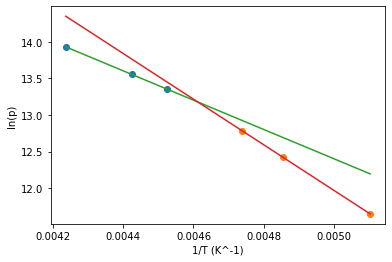

In [24]:
ln_p_high_T = slope_high_T * inverse_temperature + intercept_high_T
ln_p_low_T  = slope_low_T * inverse_temperature + intercept_low_T

plt.plot( inverse_temperature[3:6], log_pressure[3:6], 'o' ) # high T experimental data
plt.plot( inverse_temperature[0:3], log_pressure[0:3], 'o' ) # low T experimental data
plt.plot( inverse_temperature, ln_p_high_T, '-' ) # liquid-gas coexistence line
plt.plot( inverse_temperature, ln_p_low_T, '-' ) # solid-gas coexistence line
plt.xlabel( '1/T (K^-1)' )
plt.ylabel( 'ln(p)' )
plt.show()

In [25]:
from math import exp

estimated_log_pressure = 13.25
estimated_inverse_temperature = 0.0046

estimated_pressure = exp(estimated_log_pressure)
estimated_temperature = 1/estimated_inverse_temperature

print( "The triple point of CO2 is at P={} Pa and T={} K (estimated).".format( estimated_pressure, estimated_temperature ) )

The triple point of CO2 is at P=568070.0400224912 Pa and T=217.3913043478261 K (estimated).


In [22]:
# TEST CELL
# - check `estimated_pressure` is approximately correct.
# - check `estimated_temperature` is approximately correct.
# Total marks: 2

The `print` statement in the previous cell uses `"string {}".format()` to insert your calculated results into the string for printing. The values stored in these variables are inserted into the `{}` brackets in turn.

# 5. Directly Calculating the Triple Point of CO<sub>2</sub>

Everything you have done to this point you could have been done using a calculator and a graph paper. Because you have done this analysis computationally, however, you are not restricted to estimating the pressure and temperature of the triple point, but can directly calculate it. By solving the pair of simultaneous equations below, (this bit by hand) derive expressions for the temperature and pressure of the triple point. Write these solutions as code, and use the fitted high- low-temperature slopes and intercepts, to calculate the triple point.

\begin{equation}
y = m_1 x + c_1
\end{equation}
\begin{equation}
y = m_2 x + c_2
\end{equation}

In [41]:
fitted_inverse_temperature = (intercept_low_T - intercept_high_T)/(slope_high_T - slope_low_T )
fitted_temperature = 1/fitted_inverse_temperature

fitted_log_pressure = (slope_high_T * fitted_inverse_temperature) + intercept_high_T
fitted_pressure = exp(fitted_log_pressure)
                       
print( "The triple point of CO2 is at P={:.3f} Pa and T={:.3f} K (estimated).".format( fitted_pressure, fitted_temperature ) )

The triple point of CO2 is at P=528586.162 Pa and T=216.813 K (estimated).


In [27]:
# TEST CELL
# - check `fitted_pressure` is correct.
# - check `fitted_temperature` iscorrect.
# Total marks: 2

Again, the print statement uses `string.format()` to generate a clean output. This time the curly brackets `{ }` have additional code inside that sets the formatting of the inserted variable. In this case `:.3f` means a floating point number, with three decimal places.

Check that your calculated values are close to your estimated values. If they are very different (e.g. orders of magnitude), go through and check your code. This is an example of how using two methods to calculate a result, with the first a quick estimation, can help you check your method for the second, more accurate method.

How well do your estimated and fitted values compare? Are the errors from the graphical estimation similar for both the temperature and pressure, or different in size?

# Theory

## Derivation of the Clapeyron equation<a id='clapeyron_derivation'></a>

The change in free energy of a pure-phase system due to changes in $P$ and $T$ is given by

\begin{equation}
\Delta G = V\,\mathrm{d}p - S\,\mathrm{d}T.
\end{equation}

For two phases to coexist, they must be in equilibrium. Any change in $P$ or $T$ has an *equal* effect on the free energy of both phases.

\begin{equation}
\Delta G_1 = \Delta G_2
\end{equation}

\begin{equation}
V_1\,\mathrm{d}p - S_1\,\mathrm{d}T = V_2\,\mathrm{d}P - S_2\,\mathrm{T}
\end{equation}

\begin{equation}
\left(V_1-V_2\right)\mathrm{d}p = \left(S_1-S_2\right)\mathrm{d}T.
\end{equation}

\begin{equation}
\frac{\mathrm{d}p}{\mathrm{d}T} = \frac{\Delta S}{\Delta V}.
\end{equation}
Where $\Delta S$ and $\Delta V$ are the changes in  entropy and volume respectively, associated with converting one mole of phase 1 to one mole of phase 2.

Using
\begin{equation}
\Delta S = \frac{\Delta H}{T},
\end{equation}

\begin{equation}
\frac{\mathrm{d}p}{\mathrm{d}T} = \frac{\Delta H}{T\Delta V}.\tag{Clapeyron equation}
\end{equation}

[↩](#top)

## Derivation of the Clausius-Clapeyron Equation<a id='clausius_clapeyron_equation'></a>

Starting from the Clapeyron equation, if the phase equilibrium is between a gas and a condensed phase, then (e.g. for vapourisation)

\begin{equation}
\Delta H = \Delta H_\mathrm{vap},
\end{equation}

and

\begin{equation}
\Delta V \approx V_\mathrm{(g)},
\end{equation}

because $V_\mathrm{(g)}\gg\left\{V_\mathrm{(l)}, V_\mathrm{(s)}\right\}$.

If we assme the gas is ideal,

\begin{equation}
V_\mathrm{m} = \frac{RT}{p}
\end{equation}

and

\begin{equation}
\frac{\mathrm{d}p}{\mathrm{d}T} = \frac{p\Delta H_\mathrm{vap}}{RT^2}. \tag{Clausius-Clapeyron equation}
\end{equation}

[↩](#top)

## The integrated form of the Clausius-Clapeyron equation<a id='integrated_CC_equation'></a>

The Clausius-Clapeyron equation can be rearranged to give

\begin{equation}
\frac{\mathrm{d}p}{p}=\frac{\Delta H_\mathrm{vap}}{R}\frac{\mathrm{d}T}{T^2}.
\end{equation}

Integrating both sides gives

\begin{equation}
\ln p = - \frac{\Delta H_\mathrm{vap}}{RT} + c.
\end{equation}

[↩](#top)